# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create DataFrames

In [33]:
rick = pd.read_csv('data/rick_diamonds.csv')
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [34]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [35]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [36]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [37]:
diamonds.shape

(48940, 10)

# Cleaning the Data

### Transform Categorical into Numeric

In [38]:
diamonds['clarity'].value_counts()
diamonds['color'].unique()
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [39]:
clarity_dict = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
color_dict = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
cut_dict = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}

In [40]:
diamonds['n_cut'] = diamonds['cut'].map(cut_dict)
diamonds['n_color'] = diamonds['color'].map(color_dict)
diamonds['n_clarity'] = diamonds['clarity'].map(clarity_dict)

In [41]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5


In [42]:
diamonds.describe()

,carat,depth,table,price,x,y,z,n_cut,n_color,n_clarity
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,2.906416,3.407254,3.055456
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.116568,1.699858,1.645542
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,6.000000,7.000000


In [43]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      48940 non-null  float64
 1   cut        48940 non-null  object 
 2   color      48940 non-null  object 
 3   clarity    48940 non-null  object 
 4   depth      48940 non-null  float64
 5   table      48940 non-null  float64
 6   price      48940 non-null  int64  
 7   x          48940 non-null  float64
 8   y          48940 non-null  float64
 9   z          48940 non-null  float64
 10  n_cut      48940 non-null  int64  
 11  n_color    48940 non-null  int64  
 12  n_clarity  48940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.9+ MB


## Check variables correlation

<AxesSubplot:xlabel='depth', ylabel='price'>

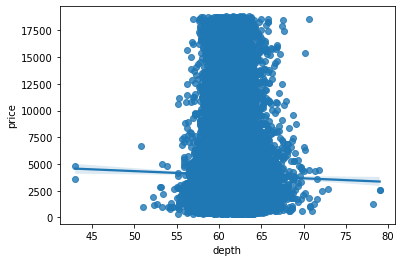

In [44]:
sns.regplot(x='depth', y='price', data=diamonds)

In [45]:
diamonds.corr()['price']

carat        0.922186
depth       -0.012037
table        0.127832
price        1.000000
x            0.885019
y            0.864059
z            0.860247
n_cut       -0.055150
n_color     -0.173129
n_clarity   -0.148668
Name: price, dtype: float64

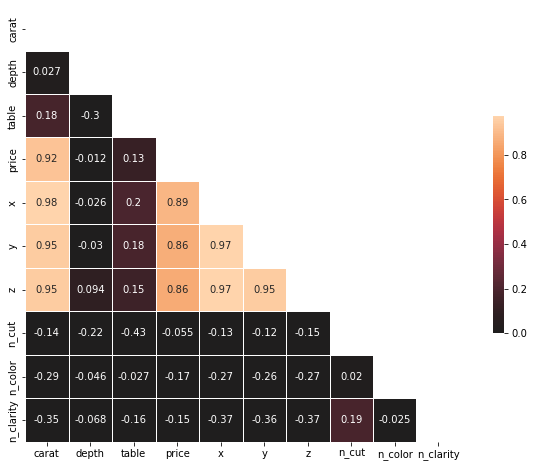

In [46]:
# Generate a mask for the upper triangle
corr = diamonds.drop(['color','cut','clarity'], axis=1).corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

# Create model

### Instanciate LinearRegression object

In [47]:
model = LinearRegression()

### Define X & Y

In [48]:
x = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)
y = diamonds['price']

### Train the model

In [49]:
model.fit(x, y)

LinearRegression()

### Predict

In [19]:
x

,carat,depth,table,x,y,z,n_cut,n_color,n_clarity
0,0.21,59.8,61.0,3.89,3.84,2.31,3,5,2
1,0.23,56.9,65.0,4.05,4.07,2.31,1,5,4
2,0.29,62.4,58.0,4.20,4.23,2.63,3,1,3
3,0.31,63.3,58.0,4.34,4.35,2.75,1,0,1
4,0.24,62.8,57.0,3.94,3.96,2.48,2,0,5
...,...,...,...,...,...,...,...,...,...
48935,0.72,62.7,59.0,5.69,5.73,3.58,3,6,2
48936,0.72,60.8,57.0,5.75,5.76,3.50,4,6,2
48937,0.72,63.1,55.0,5.69,5.75,3.61,1,6,2
48938,0.70,62.8,60.0,5.66,5.68,3.56,2,6,2


In [20]:
y_pred = model.predict(x)

In [65]:
r2_score(y, y_pred)

0.850426887514948

In [22]:
np.sqrt(mean_squared_error(y, y_pred))

1210.8731792324443

In [23]:
pd.DataFrame({'coefs':model.coef_,'Columns':x.columns})

,coefs,Columns
0,10776.532325,carat
1,-80.694641,depth
2,-26.086989,table
3,-880.922638,x
4,34.622129,y
5,-30.674911,z
6,120.221236,n_cut
7,323.041763,n_color
8,500.512993,n_clarity


<AxesSubplot:xlabel='carat', ylabel='price'>

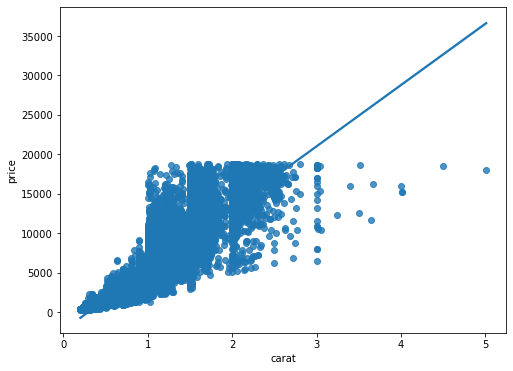

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('Model')
plt.ylabel('Price')
#plt.scatter(x, y)
sns.regplot(x='carat', y='price',data=diamonds)

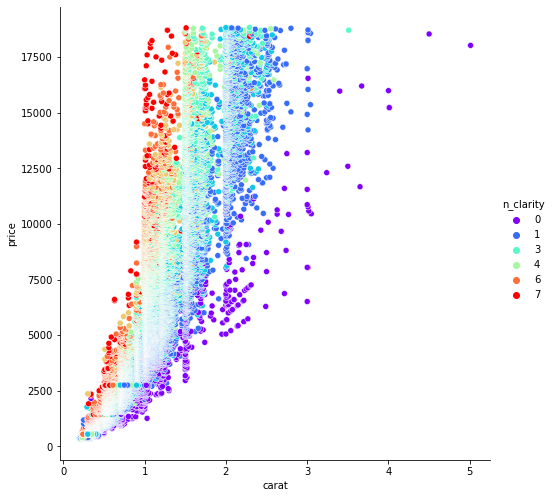

In [25]:
sns.pairplot(diamonds,y_vars='price', x_vars ='carat', hue = 'n_clarity',palette = 'rainbow',height = 7)

<AxesSubplot:xlabel='carat', ylabel='Count'>

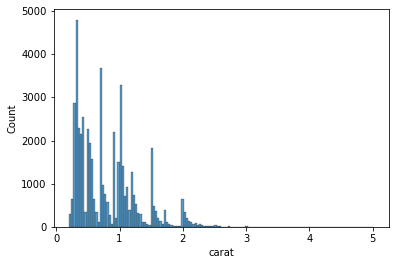

In [26]:
sns.histplot(diamonds['carat'])

In [27]:
x = diamonds[['carat']]
y = diamonds['price']

In [28]:
model.fit(x,y)

LinearRegression()

In [29]:
y_pred = model.predict(x)

In [30]:
mean_squared_error(y, y_pred)

2380375.235074832

In [31]:
model.coef_

array([7759.35277644])

In [32]:
#mean_squared_error(y, y_pred_2)

NameError: name 'y_pred_2' is not defined

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

1542.8464716474002

In [ ]:
np.sqrt(mean_squared_error(y, y_pred_2))

1543.2550315148435

In [ ]:
mask_carat = diamonds['carat'] <2.8
x_carat = diamonds.loc[mask_carat,['carat']]
y_carat = diamonds.loc[mask_carat,'price']

In [ ]:
modelo_carat = LinearRegression()
modelo_carat.fit(x_carat, y_carat)

LinearRegression()

In [ ]:
modelo_carat.coef_

array([7833.06277625])

In [ ]:
## Prever diamantes com carat <2.8, utilizando modelo com X=carat e carat < 2.8
y_carat_pred = modelo_carat.predict(x_carat)

In [ ]:
## Prever todos os diamantes, utilizando modelo com X=carat e carat < 2.8
y_pred_2 = modelo_carat.predict(x)

In [ ]:
mean_squared_error(y_carat, y_carat_pred)

2315805.228941279

In [ ]:
np.sqrt(mean_squared_error(y_carat, y_carat_pred))

1521.776997112678

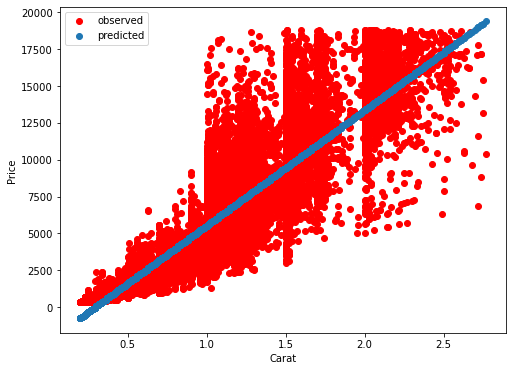

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(x_carat, y_carat, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(x_carat, y_carat_pred, label='predicted')


plt.legend();

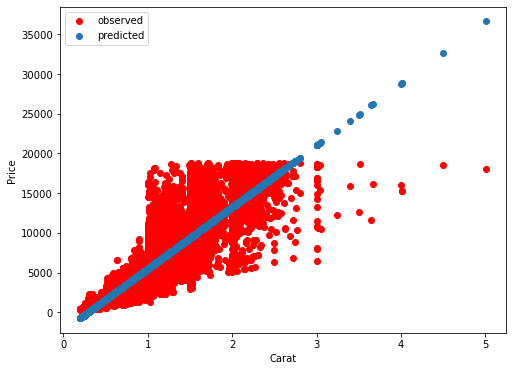

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(x, y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(x, y_pred, label='predicted')


plt.legend();

In [ ]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'n_cut', 'n_color', 'n_clarity'],
      dtype='object')

In [ ]:
mask = diamonds['carat'] < 2.7
x_1 = diamonds.loc[mask,['carat', 'n_cut', 'n_color', 'n_clarity', 'depth', 'table', 'x', 'y','z']]     ## variáveis sem os carat excluidos
y_1 = diamonds.loc[mask,'price']                                                                        ## preços dos diamantes sem os carat excluidos

In [ ]:
model_1 = LinearRegression()
model_1.fit(x_1, y_1)

LinearRegression()

In [ ]:
x_out = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)

In [ ]:
y_1_pred = model_1.predict(x_1)
y_outlier = model_1.predict(x_out)

c:\Users\Pedro\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
model_1.coef_

array([11750.57880003,   115.45647968,   328.66392662,   494.31007186,
         -93.85313899,   -29.13466101, -1232.09016666,    14.63268475,
         -32.84691027])

In [ ]:
'''
plt.figure(figsize=(8,6))
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(x_1, y_1, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(x_1, y_1_pred, label='predicted')


plt.legend();

SyntaxError: EOF while scanning triple-quoted string literal (2551033884.py, line 11)

In [ ]:
sns.regplot(x_1, y_1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y, y_pred)

2380375.235074832

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

1542.8464716474002

In [62]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y, y_pred)

0.850426887514948

In [ ]:
mean_squared_error(y_1, y_1_pred)

1347015.2315235557

In [ ]:
np.sqrt(mean_squared_error(y_1, y_1_pred))

1160.6098532769554

In [ ]:
r2_score(y_1, y_1_pred)

0.9147530586643465

In [ ]:
mean_squared_error(y, y_outlier)

1322755458.3738704

In [ ]:
np.sqrt(mean_squared_error(y, y_outlier))

36369.70522803107

In [ ]:
y

0         326
1         327
2         334
3         335
4         336
         ... 
48935    2757
48936    2757
48937    2757
48938    2757
48939    2757
Name: price, Length: 48940, dtype: int64

In [ ]:
modelo = LinearRegression()

In [ ]:
x = diamonds[['carat', 'x']]
y = diamonds['price']

In [ ]:
modelo.fit(x,y)

LinearRegression()

In [ ]:
y_pred = modelo.predict(x)

In [ ]:
modelo.coef_

array([10142.15521279, -1032.63555166])

In [ ]:
modelo.intercept_

1760.5655323526412

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

1521.349129721457

In [ ]:
pd.DataFrame({'coefs':modelo.coef_,'Columns':x.columns})

,coefs,Columns
0,10142.155213,carat
1,-1032.635552,x


In [ ]:
diamonds.corr()['price']

carat        0.922186
depth       -0.012037
table        0.127832
price        1.000000
x            0.885019
y            0.864059
z            0.860247
n_cut       -0.055150
n_color     -0.173129
n_clarity   -0.148668
Name: price, dtype: float64

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)

model = LinearRegression()
model.fit(x_std, y)

LinearRegression()

In [ ]:
pd.DataFrame([model.coef_, x]).T

,0,1
0,4808.605985,carat
1,-1158.522997,x


In [ ]:
x['carat'].std()

0.47412556922613747

In [ ]:
x['x'].std()

1.121920343659981

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,3,6,2
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,6,2
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,6,2
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,2


In [ ]:
diamonds['n_cut'].between(0,2)

0        False
1         True
2        False
3         True
4         True
         ...  
48935    False
48936    False
48937     True
48938     True
48939    False
Name: n_cut, Length: 48940, dtype: bool

c:\Users\Pedro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_clarity'>

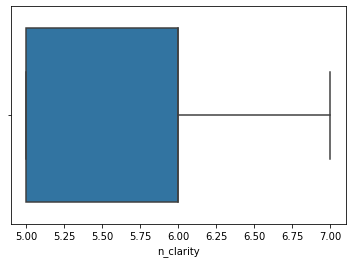

In [ ]:
sns.boxplot(diamonds.loc[diamonds['n_clarity'].between(5,7),'n_clarity']) 

In [ ]:
diamonds.loc[diamonds['n_clarity'].between(5,7), 'n_clarity'].describe()

count    9569.000000
mean        5.684189
std         0.743816
min         5.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: n_clarity, dtype: float64

In [ ]:
diamonds['n_clarity'].describe()

count    48940.000000
mean         3.055456
std          1.645542
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: n_clarity, dtype: float64

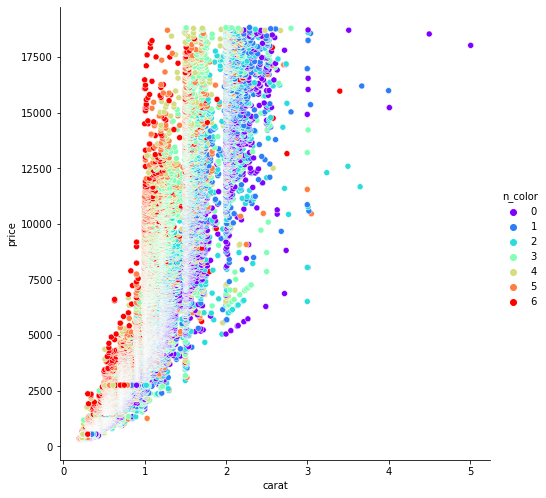

In [ ]:
sns.pairplot(diamonds,y_vars='price', x_vars ='carat', hue = 'n_color',palette = 'rainbow',height = 7)

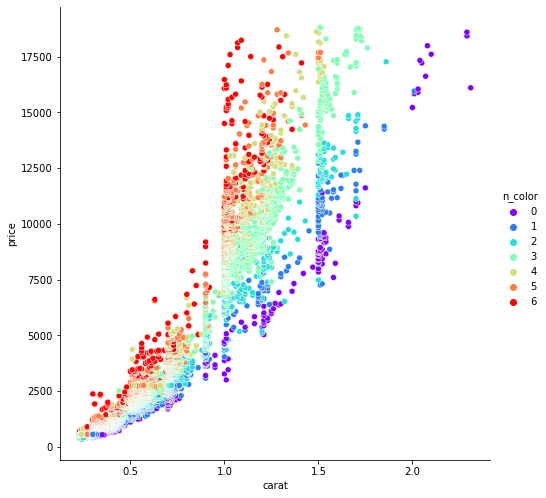

In [ ]:
sns.pairplot(diamonds[clarity_nice],y_vars='price', x_vars ='carat', hue = 'n_color',palette = 'rainbow',height = 7)

In [ ]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'n_cut', 'n_color', 'n_clarity'],
      dtype='object')

In [ ]:
column_list = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_color']

In [ ]:
clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
x_clarity_bad = diamonds.loc[clarity_bad, column_list]
x_clarity_med = diamonds.loc[clarity_med, column_list]
x_clarity_good = diamonds.loc[clarity_good, column_list]
x_clarity_nice = diamonds.loc[clarity_nice, column_list]

y_clarity_bad = diamonds.loc[clarity_bad, 'price']
y_clarity_med = diamonds.loc[clarity_med, 'price']
y_clarity_good = diamonds.loc[clarity_good, 'price']
y_clarity_nice = diamonds.loc[clarity_nice, 'price']

In [ ]:
model_clarity_bad = LinearRegression()
model_clarity_med = LinearRegression()
model_clarity_good = LinearRegression()
model_clarity_nice = LinearRegression()

In [ ]:
model_clarity_bad.fit(x_clarity_bad, y_clarity_bad)
model_clarity_med.fit(x_clarity_med, y_clarity_med)
model_clarity_good.fit(x_clarity_good, y_clarity_good)
model_clarity_nice.fit(x_clarity_nice, y_clarity_nice)

LinearRegression()

In [ ]:
print(model_clarity_bad.score(x_clarity_bad, y_clarity_bad))
print(model_clarity_med.score(x_clarity_med, y_clarity_med))
print(model_clarity_good.score(x_clarity_good, y_clarity_good))
print(model_clarity_nice.score(x_clarity_nice, y_clarity_nice))

0.9278779823237592
0.9369951738091329
0.9366079304382791
0.9220235110798918


In [ ]:
y_pred_clarity_bad = model_clarity_bad.predict(x_clarity_bad)
y_pred_clarity_med = model_clarity_med.predict(x_clarity_med)
y_pred_clarity_good = model_clarity_good.predict(x_clarity_good)
y_pred_clarity_nice = model_clarity_nice.predict(x_clarity_nice)

In [ ]:
print(np.sqrt(mean_squared_error(y_clarity_bad, y_pred_clarity_bad)))
print(np.sqrt(mean_squared_error(y_clarity_med, y_pred_clarity_med)))
print(np.sqrt(mean_squared_error(y_clarity_good, y_pred_clarity_good)))
print(np.sqrt(mean_squared_error(y_clarity_nice, y_pred_clarity_nice)))

753.3436447024467
1013.987527290792
1012.5664261007228
1028.7056086021323


In [ ]:
def verifica_modelo(linha,modelos):
    if linha['n_clarity'] == 0:
        return modelos['bad'].predict(pd.DataFrame(linha[column_list]).T)[0]
    elif linha['n_clarity'] in [1,2] :
        return modelos['med'].predict(pd.DataFrame(linha[column_list]).T)[0]
    elif linha['n_clarity'] in (3,4):
        return modelos['good'].predict(pd.DataFrame(linha[column_list]).T)[0]
    else:
        return modelos['nice'].predict(pd.DataFrame(linha[column_list]).T)[0]

In [ ]:
diamonds.loc[4, 'n_clarity'] in [1,2]

False

In [ ]:
model_clarity_nice.predict(pd.DataFrame(diamonds.iloc[4][column_list]).T)

array([-1254.36166951])

In [ ]:
pd.DataFrame(diamonds.iloc[4][column_list]).T

,carat,depth,table,x,y,z,n_cut,n_color
4,0.24,62.8,57.0,3.94,3.96,2.48,2,0


In [ ]:
previsao = x.apply(verifica_modelo, modelos = {'bad':model_clarity_bad,
                                                'med':model_clarity_med,
                                                'good':model_clarity_good,
                                                'nice':model_clarity_nice}, axis=1)

In [ ]:
r2_score(y, previsao)

0.9354824025692671

In [ ]:
np.sqrt(mean_squared_error(y, previsao))

1013.2929925851224

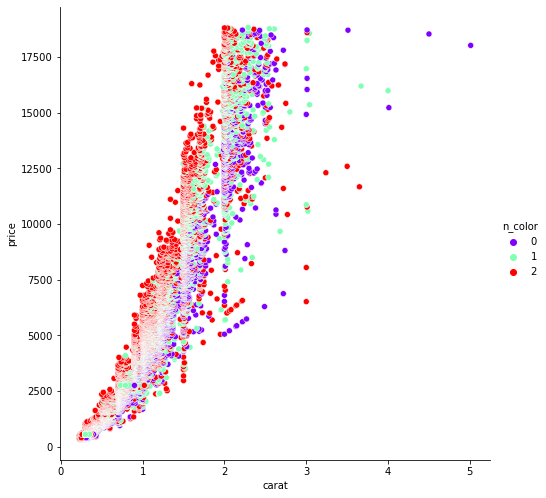

In [75]:
sns.pairplot(diamonds[color_bad],y_vars='price', x_vars ='carat', hue = 'n_color',palette = 'rainbow',height = 7)

In [74]:
diamonds['n_color'].unique()

array([5, 1, 0, 2, 4, 3, 6], dtype=int64)

In [76]:
color_bad = diamonds['n_color'].between(1,2)
color_med = diamonds['n_color'].between(3,4)
color_good = diamonds['n_color'].between(5,6)

In [69]:
print(diamonds[color_bad].shape[0]/diamonds.shape[0])
print(diamonds[color_med].shape[0]/diamonds.shape[0])
print(diamonds[color_good].shape[0]/diamonds.shape[0])

0.30590519002860644
0.3870044953003678
0.30709031467102577


In [77]:
column_list_1 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_clarity']

In [78]:
x_color_bad = diamonds.loc[color_bad, column_list_1]
x_color_med = diamonds.loc[color_med, column_list_1]
x_color_good = diamonds.loc[color_good, column_list_1]

y_color_bad = diamonds.loc[color_bad, 'price']
y_color_med = diamonds.loc[color_med, 'price']
y_color_good = diamonds.loc[color_good, 'price']

In [79]:
model_color_bad = LinearRegression()
model_color_med = LinearRegression()
model_color_good = LinearRegression()

In [80]:
model_color_bad.fit(x_color_bad, y_color_bad)
model_color_med.fit(x_color_med, y_color_med)
model_color_good.fit(x_color_good, y_color_good)

LinearRegression()

In [81]:
print(model_color_bad.score(x_color_bad, y_color_bad))
print(model_color_med.score(x_color_med, y_color_med))
print(model_color_good.score(x_color_good, y_color_good))

0.9287524386218162
0.9128189526699374
0.8971447516135809


In [82]:
y_pred_color_bad = model_color_bad.predict(x_color_bad)
y_pred_color_med = model_color_med.predict(x_color_med)
y_pred_color_good = model_color_good.predict(x_color_good)

In [83]:
print(np.sqrt(mean_squared_error(y_color_bad, y_pred_color_bad)))
print(np.sqrt(mean_squared_error(y_color_med, y_pred_color_med)))
print(np.sqrt(mean_squared_error(y_color_good, y_pred_color_good)))

1184.953862142621
1159.1035564641852
1075.3656395317034


In [84]:
def verifica_modelo_2(linha,modelos):
    if linha['n_color'] in [0,2]:
        return modelos['bad'].predict(pd.DataFrame(linha[column_list_1]).T)[0]
    elif linha['n_color'] in [3,4] :
        return modelos['med'].predict(pd.DataFrame(linha[column_list_1]).T)[0]
    else:
        return modelos['good'].predict(pd.DataFrame(linha[column_list_1]).T)[0]


In [85]:
previsao_1 = x.apply(verifica_modelo_2, modelos = {'bad':model_color_bad,
                                                    'med':model_color_med,
                                                    'good':model_color_good,}, axis=1)

In [86]:
r2_score(y, previsao_1)

0.8906850932371736

In [87]:
np.sqrt(mean_squared_error(y, previsao_1))

1318.9721953636351